Resized Images:


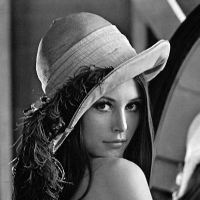

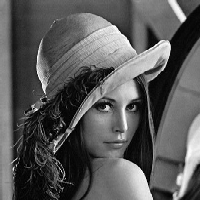

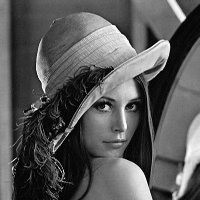

Blurred Images:


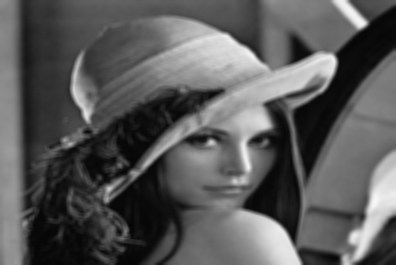

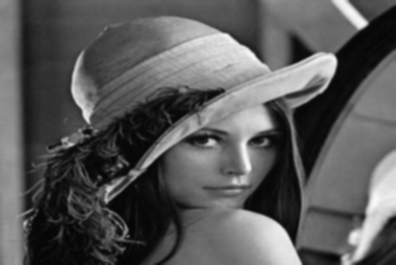

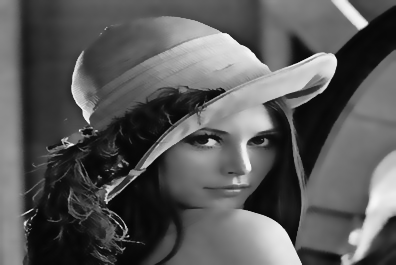

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/Picture1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

resized_linear = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (200, 200), interpolation=cv2.INTER_NEAREST)
resized_polynomial = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

print("Resized Images:")
cv2_imshow(resized_linear)
cv2_imshow(resized_nearest)
cv2_imshow(resized_polynomial)

box_blur = cv2.blur(image, (5, 5))

gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

adaptive_blur = cv2.bilateralFilter(image, 9, 75, 75)

print("Blurred Images:")
cv2_imshow(box_blur)
cv2_imshow(gaussian_blur)
cv2_imshow(adaptive_blur)


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')

print("ROC AUC Score (Random Forest):", roc_auc)


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

ROC AUC Score (Random Forest): 0.9995302041507188


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

svm_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report (SVM):\n", classification_report(y_test, y_pred))
from sklearn.metrics import roc_auc_score

y_prob = svm_model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

print("ROC AUC Score:", roc_auc)

Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.96      1.00      0.98        46
           5       0.96      0.98      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

ROC AUC Score: 0.999563414014869
